In [8]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns

# Задание № 1

In [9]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

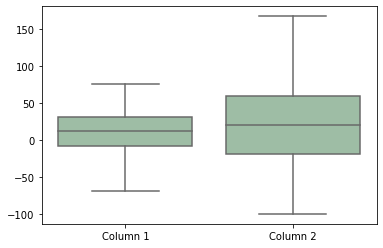

In [10]:
df = pd.DataFrame({'Column 1': A, 'Column 2' : B})  # 1st row as the column names
ax = sns.boxplot(data=df, color='#99c2a2')
plt.show()

In [11]:
fvalue, pvalue = stats.f_oneway(df['Column 1'], df['Column 2'])
fvalue, pvalue

(3.0060646842692673, 0.08451003973499746)

#### pvalue достаточно большое, чтобы утверждать, что различия между наборами данных случайно

# Задание 2

In [12]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

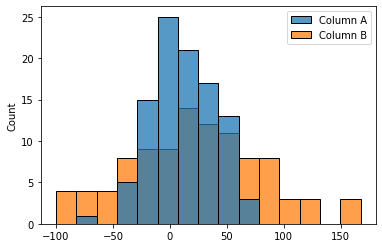

In [13]:
df = pd.DataFrame({'Column A': A, 'Column B' : B})  # 1st row as the column names
ax = sns.histplot(data=df, color='#99c2a2')
plt.show()

In [14]:
stats.ttest_ind(A, B)

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)

#### pvalue больше 0,05, следовательно принимаем основную гипотезу о равенстве выборок

# Задание № 3

In [18]:
from scipy.stats import f_oneway # импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

F, p = f_oneway(water, nutri, mineral) # Дисперсионный анализ

alpha = 0.05
print(F, p)
if p > alpha:
    print('Отличия между распределениями случайно. Гипотезу H0 о равенстве выборок принимаем.')
else:
    print('Отличия между распределениями системные. Гипотезу H0 отвергаем.')


12.525963044834192 2.9240047906326866e-05
Отличия между распределениями системные. Гипотезу H0 отвергаем.


<AxesSubplot:xlabel='kinds', ylabel='sizes'>

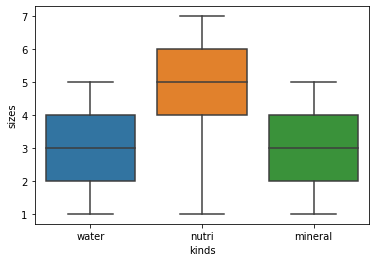

In [27]:
sizes = water + nutri + mineral
kinds = ['water']*len(water) + ['nutri']*len(nutri) + ['mineral']*len(mineral)
df_pickles = pd.DataFrame()
df_pickles['sizes'] = sizes
df_pickles['kinds'] = kinds

sns.boxplot(x = 'kinds', y = 'sizes', data= df_pickles)

# Задача № 1

In [33]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head(50)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False


In [48]:
pok_grass = pokemon[['Class 1', 'Attack' ]].loc[pokemon['Class 1'] == 'Grass']['Attack']
pok_rock = pokemon[['Class 1', 'Attack' ]].loc[pokemon['Class 1'] == 'Rock']['Attack']

In [51]:
from scipy.stats import mannwhitneyu # Импортируем нужный тест из пакета scipy

stat, p = mannwhitneyu(pok_grass, pok_rock)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1059.000, p=0.003
Разные распределения (отвергаем H0)


# Задание № 2

In [104]:
pok_water = pokemon[['Class 1', 'Speed' ]].loc[pokemon['Class 1'] == 'Water']['Speed'].to_list()
pok_normal = pokemon[['Class 1', 'Speed' ]].loc[pokemon['Class 1'] == 'Normal']['Speed'].to_list()

In [105]:
F, p = f_oneway(pok_water, pok_normal)

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

2.4751667965052118 0.1171770080335777
Одинаковое распределение (не отвергаем H0)


# Задание № 3

In [107]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [120]:
treat_pok = pokemon.loc[pokemon['Name'].isin(treathed_pokemon)]

In [121]:
import scipy.stats as stats
# Функция f_oneway принимает группы в качестве входных данных и возвращает значения F и P
fvalue, pvalue = stats.f_oneway(treat_pok['Speed'], pokemon['Speed'])

print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

27.83973509146876 1.6972695854945625e-07


#### p_value очень мало, то есть отличие выборок списать на случайность не получается. Профессор Оук действительно изобрёл сыворотку, повышающую скорость.

# Задание № 5

In [126]:
pok_legend = pokemon[['HP', 'Attack', 'Defense' ]].loc[pokemon['Legendary'] == True]
pok_legend['sum'] = pok_legend['HP'] + pok_legend['Attack'] + pok_legend['Defense']
pok_common = pokemon[['HP', 'Attack', 'Defense' ]].loc[pokemon['Legendary'] == False]
pok_common['sum'] = pok_common['HP'] + pok_common['Attack'] + pok_common['Defense']

#### применим тест Стьюдента

In [128]:
stats.ttest_ind(pok_legend['sum'].to_list(), pok_common['sum'].to_list())

Ttest_indResult(statistic=11.591852366462316, pvalue=7.970942205722087e-29)

#### p_value очень маленькое, поэтому отличия между легендарными и обычными покемонами списать на случайность нельзя

# Задание № 6

In [129]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [144]:
pok_rock_class = pokemon.loc[pokemon['Class 2'].isin(['Rock'])]['Defense'].to_list()
pok_ground_class = pokemon.loc[pokemon['Class 2'].isin(['Ground'])]['Defense'].to_list()
pok_steel_class = pokemon.loc[pokemon['Class 2'].isin(['Steel'])]['Defense'].to_list()
pok_ice_class = pokemon.loc[pokemon['Class 2'].isin(['Ice'])]['Defense'].to_list()

In [143]:
pok_rock_class

[95, 120, 230, 120, 85, 100, 140, 180, 130, 130, 85, 125, 103, 133]

In [146]:
F, p = f_oneway(pok_rock_class, pok_ground_class, pok_steel_class, pok_ice_class)
alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (покемоны действительно имею одинаковый уровень защиты)')
else:
    print('Разное распределение (идею о том, что покемоны имею одинаковую защиту отклоняем)')

4.149079539457768 0.008687431105943765
Разное распределение (идею о том, что покемоны имею одинаковую защиту отклоняем)
